In [83]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [84]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [85]:
pip install python-dotenv

In [86]:
# Initial imports
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer



%matplotlib inline

In [87]:
df = pd.read_csv('223k crypto news headlines. Dataset. BDCenter Digital.csv')

In [88]:
df

,publishdate,headlinetext
0,20170707,what is apx
1,20171016,what is not
2,20171116,what is ark
3,20171125,what is eos
4,20180115,what is nxt
...,...,...
223079,20190721,qompass announces airdrop ahead of their ico p...
223080,20190308,confideal mvp 13 cooperations with other compa...
223081,20190226,pr secure identity ledger corporation goes dir...
223082,20190722,mymedis readies for ico launch creates a new p...


In [89]:
df.head(10)

,publishdate,headlinetext
0,20170707,what is apx
1,20171016,what is not
2,20171116,what is ark
3,20171125,what is eos
4,20180115,what is nxt
5,20180310,what is neo
6,20181015,what is mix
7,20170710,what is ubiq
8,20170812,cexio review
9,20171123,what is lisk


In [90]:
df.isnull().any()

publishdate     False
headlinetext    False
dtype: bool

In [91]:
df['len'] = df['headlinetext'].str.len()
df.head(10)

,publishdate,headlinetext,len
0,20170707,what is apx,11
1,20171016,what is not,11
2,20171116,what is ark,11
3,20171125,what is eos,11
4,20180115,what is nxt,11
5,20180310,what is neo,11
6,20181015,what is mix,11
7,20170710,what is ubiq,12
8,20170812,cexio review,12
9,20171123,what is lisk,12


In [92]:
pip install vaderSentiment

In [93]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

In [94]:
from textblob import TextBlob

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Polarity'] = df['headlinetext'].apply(getPolarity)

df.head(10)

,publishdate,headlinetext,len,Polarity
0,20170707,what is apx,11,0.0
1,20171016,what is not,11,0.0
2,20171116,what is ark,11,0.0
3,20171125,what is eos,11,0.0
4,20180115,what is nxt,11,0.0
5,20180310,what is neo,11,0.0
6,20181015,what is mix,11,0.0
7,20170710,what is ubiq,12,0.0
8,20170812,cexio review,12,0.0
9,20171123,what is lisk,12,0.0


In [95]:
def getSentiment(score):
  if score <0 :
    return 'Negetive'
  elif score == 0 :
    return 'Neutral'
  else:
    return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getSentiment)
df.head(10)

,publishdate,headlinetext,len,Polarity,Sentiment
0,20170707,what is apx,11,0.0,Neutral
1,20171016,what is not,11,0.0,Neutral
2,20171116,what is ark,11,0.0,Neutral
3,20171125,what is eos,11,0.0,Neutral
4,20180115,what is nxt,11,0.0,Neutral
5,20180310,what is neo,11,0.0,Neutral
6,20181015,what is mix,11,0.0,Neutral
7,20170710,what is ubiq,12,0.0,Neutral
8,20170812,cexio review,12,0.0,Neutral
9,20171123,what is lisk,12,0.0,Neutral


<function matplotlib.pyplot.show>

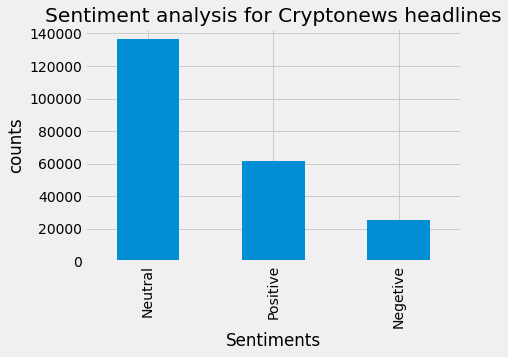

In [96]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.title('Sentiment analysis for Cryptonews headlines')
df['Sentiment'].value_counts().plot(kind = 'bar')
plt.xlabel('Sentiments')
plt.ylabel('counts')
plt.show

In [97]:
from datetime import datetime

In [98]:
df = df.sort_values(by="publishdate")
df

,publishdate,headlinetext,len,Polarity,Sentiment
326,20130401,is bitcoin in a bubble,22,0.000000,Neutral
2412,20130401,beginners guide to diamond dmd,30,0.000000,Neutral
2067,20130405,silberpfeil issues amg tokens,29,0.000000,Neutral
2824,20130410,bitcoin correction not over yet,31,0.000000,Neutral
18256,20130413,anlise tcnica bitcoin 200719 qual o prximo alvo,47,0.000000,Neutral
...,...,...,...,...,...
151654,20191231,bitcoin analysis for 20191231 premium analysis...,57,0.000000,Neutral
151630,20191231,bitcoin may cause the price surged 40 to a lev...,57,0.000000,Neutral
154685,20191231,japan is one of the top crypto destination to ...,59,0.500000,Positive
202152,20191231,the bitcoin mining rates increased steadily as...,80,0.083333,Positive


In [99]:
import pandas as pd
import datetime


df['publishdate']=pd.to_datetime(df['publishdate'],format='%Y%m%d')
df1 = df
df1

,publishdate,headlinetext,len,Polarity,Sentiment
326,2013-04-01,is bitcoin in a bubble,22,0.000000,Neutral
2412,2013-04-01,beginners guide to diamond dmd,30,0.000000,Neutral
2067,2013-04-05,silberpfeil issues amg tokens,29,0.000000,Neutral
2824,2013-04-10,bitcoin correction not over yet,31,0.000000,Neutral
18256,2013-04-13,anlise tcnica bitcoin 200719 qual o prximo alvo,47,0.000000,Neutral
...,...,...,...,...,...
151654,2019-12-31,bitcoin analysis for 20191231 premium analysis...,57,0.000000,Neutral
151630,2019-12-31,bitcoin may cause the price surged 40 to a lev...,57,0.000000,Neutral
154685,2019-12-31,japan is one of the top crypto destination to ...,59,0.500000,Positive
202152,2019-12-31,the bitcoin mining rates increased steadily as...,80,0.083333,Positive


In [100]:
df1 = df1.sort_values(by="publishdate")
df1

,publishdate,headlinetext,len,Polarity,Sentiment
326,2013-04-01,is bitcoin in a bubble,22,0.000000,Neutral
2412,2013-04-01,beginners guide to diamond dmd,30,0.000000,Neutral
2067,2013-04-05,silberpfeil issues amg tokens,29,0.000000,Neutral
2824,2013-04-10,bitcoin correction not over yet,31,0.000000,Neutral
18256,2013-04-13,anlise tcnica bitcoin 200719 qual o prximo alvo,47,0.000000,Neutral
...,...,...,...,...,...
195764,2019-12-31,bullish bitcoin hashrate continues climbing as...,76,0.000000,Neutral
208951,2019-12-31,imf says countries eyeing central bank digital...,85,-0.051852,Negetive
182803,2019-12-31,turkish banks blockchain platform for digital ...,70,0.068182,Positive
194030,2019-12-31,debate ensues after 68 of bch hashrate mined b...,75,0.000000,Neutral


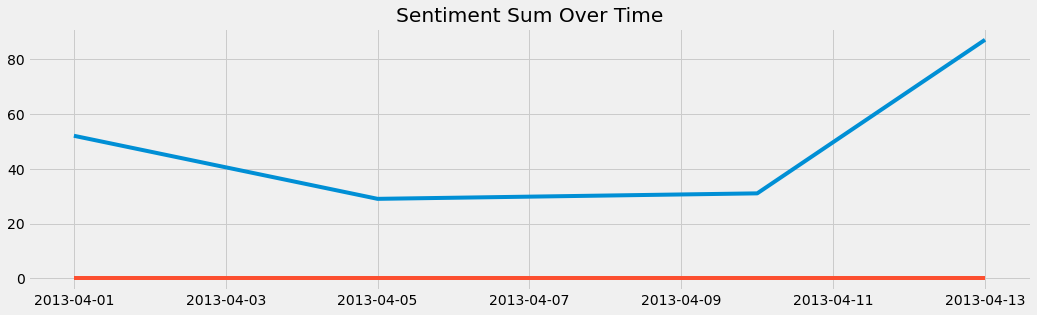

In [102]:
plt.figure(figsize = (16,4.5))
plt.title('Sentiment Sum Over Time')
polarity = df1.head(6).groupby(['publishdate']).sum(['Polarity'])
plt.plot(polarity.index,polarity)

In [103]:
df1.dtypes

publishdate     datetime64[ns]
headlinetext            object
len                      int64
Polarity               float64
Sentiment               object
dtype: object

In [104]:
from google.colab import files
files.upload()

Saving Untitled spreadsheet - Bitcoin Historical Data - Investing.com India(1).csv to Untitled spreadsheet - Bitcoin Historical Data - Investing.com India(1) (1).csv


{'Untitled spreadsheet - Bitcoin Historical Data - Investing.com India(1).csv': b'Date,Price,Open,High,Low,Vol.,Change %\r\n2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%\r\n2019-12-30,"7,261.80","7,397.50","7,420.90","7,244.10",606.11K,-1.84%\r\n2019-12-29,"7,397.50","7,321.60","7,518.90","7,303.00",611.69K,1.04%\r\n2019-12-28,"7,321.50","7,261.90","7,375.90","7,256.50",610.96K,0.82%\r\n2019-12-27,"7,261.70","7,210.80","7,293.80","7,128.50",718.07K,0.70%\r\n2019-12-26,"7,210.90","7,225.00","7,414.30","7,177.30",795.09K,-0.19%\r\n2019-12-25,"7,224.80","7,268.30","7,542.40","7,150.90",625.41K,-0.60%\r\n2019-12-24,"7,268.30","7,322.40","7,433.20","7,185.70",785.54K,-0.74%\r\n2019-12-23,"7,322.80","7,496.20","7,684.00","7,276.20",952.16K,-2.31%\r\n2019-12-22,"7,495.80","7,156.30","7,501.10","7,142.00",677.94K,4.74%\r\n2019-12-21,"7,156.20","7,196.40","7,197.60","7,129.60",468.74K,-0.56%\r\n2019-12-20,"7,196.40","7,165.50","7,218.40","7,107.70",627.04K,0.43%\r\n2019-

In [105]:
pf = pd.read_csv('Untitled spreadsheet - Bitcoin Historical Data - Investing.com India(1).csv')
pf

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%
1,2019-12-30,"7,261.80","7,397.50","7,420.90","7,244.10",606.11K,-1.84%
2,2019-12-29,"7,397.50","7,321.60","7,518.90","7,303.00",611.69K,1.04%
3,2019-12-28,"7,321.50","7,261.90","7,375.90","7,256.50",610.96K,0.82%
4,2019-12-27,"7,261.70","7,210.80","7,293.80","7,128.50",718.07K,0.70%
...,...,...,...,...,...,...,...
2461,2013-04-05,142.3,132.1,144.9,130.2,68.59K,7.72%
2462,2013-04-04,132.1,135,142.1,116.4,88.36K,-2.13%
2463,2013-04-03,135,118,147,110,152.71K,14.43%
2464,2013-04-02,118,104,118.4,99,81.29K,13.44%


In [106]:
pf1 = pf.rename(columns = {'Date': 'publishdate'}, inplace = False)
pf1

,publishdate,Price,Open,High,Low,Vol.,Change %
0,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%
1,2019-12-30,"7,261.80","7,397.50","7,420.90","7,244.10",606.11K,-1.84%
2,2019-12-29,"7,397.50","7,321.60","7,518.90","7,303.00",611.69K,1.04%
3,2019-12-28,"7,321.50","7,261.90","7,375.90","7,256.50",610.96K,0.82%
4,2019-12-27,"7,261.70","7,210.80","7,293.80","7,128.50",718.07K,0.70%
...,...,...,...,...,...,...,...
2461,2013-04-05,142.3,132.1,144.9,130.2,68.59K,7.72%
2462,2013-04-04,132.1,135,142.1,116.4,88.36K,-2.13%
2463,2013-04-03,135,118,147,110,152.71K,14.43%
2464,2013-04-02,118,104,118.4,99,81.29K,13.44%


In [107]:
pf1 = pf1.sort_values(by="publishdate")
pf1

,publishdate,Price,Open,High,Low,Vol.,Change %
2465,2013-04-01,104,93,106,92.2,90.56K,11.79%
2464,2013-04-02,118,104,118.4,99,81.29K,13.44%
2463,2013-04-03,135,118,147,110,152.71K,14.43%
2462,2013-04-04,132.1,135,142.1,116.4,88.36K,-2.13%
2461,2013-04-05,142.3,132.1,144.9,130.2,68.59K,7.72%
...,...,...,...,...,...,...,...
4,2019-12-27,"7,261.70","7,210.80","7,293.80","7,128.50",718.07K,0.70%
3,2019-12-28,"7,321.50","7,261.90","7,375.90","7,256.50",610.96K,0.82%
2,2019-12-29,"7,397.50","7,321.60","7,518.90","7,303.00",611.69K,1.04%
1,2019-12-30,"7,261.80","7,397.50","7,420.90","7,244.10",606.11K,-1.84%


In [108]:
pf1.dtypes

publishdate    object
Price          object
Open           object
High           object
Low            object
Vol.           object
Change %       object
dtype: object

In [109]:
import pandas as pd
from datetime import datetime

pf1['publishdate'] = pd.to_datetime(pf1['publishdate'])

In [110]:
pf1

,publishdate,Price,Open,High,Low,Vol.,Change %
2465,2013-04-01,104,93,106,92.2,90.56K,11.79%
2464,2013-04-02,118,104,118.4,99,81.29K,13.44%
2463,2013-04-03,135,118,147,110,152.71K,14.43%
2462,2013-04-04,132.1,135,142.1,116.4,88.36K,-2.13%
2461,2013-04-05,142.3,132.1,144.9,130.2,68.59K,7.72%
...,...,...,...,...,...,...,...
4,2019-12-27,"7,261.70","7,210.80","7,293.80","7,128.50",718.07K,0.70%
3,2019-12-28,"7,321.50","7,261.90","7,375.90","7,256.50",610.96K,0.82%
2,2019-12-29,"7,397.50","7,321.60","7,518.90","7,303.00",611.69K,1.04%
1,2019-12-30,"7,261.80","7,397.50","7,420.90","7,244.10",606.11K,-1.84%


In [111]:
pf1.dtypes

publishdate    datetime64[ns]
Price                  object
Open                   object
High                   object
Low                    object
Vol.                   object
Change %               object
dtype: object

In [112]:
df1.dtypes

publishdate     datetime64[ns]
headlinetext            object
len                      int64
Polarity               float64
Sentiment               object
dtype: object

In [113]:
merge = pf1.merge(df1,how = 'inner',on = 'publishdate',left_index=True)

In [114]:
mf = merge
mf

,publishdate,Price,Open,High,Low,Vol.,Change %,headlinetext,len,Polarity,Sentiment
326,2013-04-01,104,93,106,92.2,90.56K,11.79%,is bitcoin in a bubble,22,0.000000,Neutral
2412,2013-04-01,104,93,106,92.2,90.56K,11.79%,beginners guide to diamond dmd,30,0.000000,Neutral
2067,2013-04-05,142.3,132.1,144.9,130.2,68.59K,7.72%,silberpfeil issues amg tokens,29,0.000000,Neutral
2824,2013-04-10,165,230,266,105,190.18K,-28.26%,bitcoin correction not over yet,31,0.000000,Neutral
18256,2013-04-13,93,117,130,85.5,238.35K,-20.51%,anlise tcnica bitcoin 200719 qual o prximo alvo,47,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
195764,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,bullish bitcoin hashrate continues climbing as...,76,0.000000,Neutral
208951,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,imf says countries eyeing central bank digital...,85,-0.051852,Negetive
182803,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,turkish banks blockchain platform for digital ...,70,0.068182,Positive
194030,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,debate ensues after 68 of bch hashrate mined b...,75,0.000000,Neutral


In [115]:
mf = mf.dropna()
mf

,publishdate,Price,Open,High,Low,Vol.,Change %,headlinetext,len,Polarity,Sentiment
326,2013-04-01,104,93,106,92.2,90.56K,11.79%,is bitcoin in a bubble,22,0.000000,Neutral
2412,2013-04-01,104,93,106,92.2,90.56K,11.79%,beginners guide to diamond dmd,30,0.000000,Neutral
2067,2013-04-05,142.3,132.1,144.9,130.2,68.59K,7.72%,silberpfeil issues amg tokens,29,0.000000,Neutral
2824,2013-04-10,165,230,266,105,190.18K,-28.26%,bitcoin correction not over yet,31,0.000000,Neutral
18256,2013-04-13,93,117,130,85.5,238.35K,-20.51%,anlise tcnica bitcoin 200719 qual o prximo alvo,47,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
195764,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,bullish bitcoin hashrate continues climbing as...,76,0.000000,Neutral
208951,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,imf says countries eyeing central bank digital...,85,-0.051852,Negetive
182803,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,turkish banks blockchain platform for digital ...,70,0.068182,Positive
194030,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,debate ensues after 68 of bch hashrate mined b...,75,0.000000,Neutral


In [116]:
mf.isnull().any()

publishdate     False
Price           False
Open            False
High            False
Low             False
Vol.            False
Change %        False
headlinetext    False
len             False
Polarity        False
Sentiment       False
dtype: bool

In [117]:
mf

,publishdate,Price,Open,High,Low,Vol.,Change %,headlinetext,len,Polarity,Sentiment
326,2013-04-01,104,93,106,92.2,90.56K,11.79%,is bitcoin in a bubble,22,0.000000,Neutral
2412,2013-04-01,104,93,106,92.2,90.56K,11.79%,beginners guide to diamond dmd,30,0.000000,Neutral
2067,2013-04-05,142.3,132.1,144.9,130.2,68.59K,7.72%,silberpfeil issues amg tokens,29,0.000000,Neutral
2824,2013-04-10,165,230,266,105,190.18K,-28.26%,bitcoin correction not over yet,31,0.000000,Neutral
18256,2013-04-13,93,117,130,85.5,238.35K,-20.51%,anlise tcnica bitcoin 200719 qual o prximo alvo,47,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
195764,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,bullish bitcoin hashrate continues climbing as...,76,0.000000,Neutral
208951,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,imf says countries eyeing central bank digital...,85,-0.051852,Negetive
182803,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,turkish banks blockchain platform for digital ...,70,0.068182,Positive
194030,2019-12-31,"7,196.40","7,261.50","7,331.00","7,167.40",586.60K,-0.90%,debate ensues after 68 of bch hashrate mined b...,75,0.000000,Neutral


In [118]:
mf.dtypes

publishdate     datetime64[ns]
Price                   object
Open                    object
High                    object
Low                     object
Vol.                    object
Change %                object
headlinetext            object
len                      int64
Polarity               float64
Sentiment               object
dtype: object

In [119]:
mf['Price'] = pd.to_numeric(mf['Price'],errors = 'coerce')

In [120]:
mf.dtypes

publishdate     datetime64[ns]
Price                  float64
Open                    object
High                    object
Low                     object
Vol.                    object
Change %                object
headlinetext            object
len                      int64
Polarity               float64
Sentiment               object
dtype: object

In [121]:
print(mf.columns)

Index(['publishdate', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %',
       'headlinetext', 'len', 'Polarity', 'Sentiment'],
      dtype='object')


In [122]:
# Dataframe with Adj close, ts_polarity, twitter_volume of APPL
mf = mf[["Price", "Polarity","Sentiment"]]
mf.head()

,Price,Polarity,Sentiment
326,104.0,0.0,Neutral
2412,104.0,0.0,Neutral
2067,142.3,0.0,Neutral
2824,165.0,0.0,Neutral
18256,93.0,0.0,Neutral


In [123]:
mf.isnull().any()

Price         True
Polarity     False
Sentiment    False
dtype: bool

In [124]:
mf = mf.dropna()
mf

,Price,Polarity,Sentiment
326,104.0,0.000000,Neutral
2412,104.0,0.000000,Neutral
2067,142.3,0.000000,Neutral
2824,165.0,0.000000,Neutral
18256,93.0,0.000000,Neutral
...,...,...,...
15728,969.4,0.600000,Positive
50732,969.4,0.031250,Positive
75591,969.4,0.136364,Positive
40917,969.4,0.000000,Neutral


In [125]:
mf.isnull().any()

Price        False
Polarity     False
Sentiment    False
dtype: bool

In [126]:
mf.dtypes

Price        float64
Polarity     float64
Sentiment     object
dtype: object

In [127]:
# Sentiment Count
mf['Sentiment'].value_counts()

Neutral     24653
Positive     9584
Negetive     3850
Name: Sentiment, dtype: int64

In [128]:
#Stock Trend based on difference between current price to previous day price and coverting them to '0' as fall and '1' as rise in stock price
mf['Price Diff'] = mf['Price'].diff()
mf.dropna(inplace = True)
mf['Trend'] = np.where(
    mf['Price Diff'] > 0 , 1, 0)

mf.head()

,Price,Polarity,Sentiment,Price Diff,Trend
2412,104.0,0.0,Neutral,0.0,0
2067,142.3,0.0,Neutral,38.3,1
2824,165.0,0.0,Neutral,22.7,1
18256,93.0,0.0,Neutral,-72.0,0
8932,93.0,0.0,Neutral,0.0,0


In [129]:
# Binary encoding Sentiment column
appl_trend = mf[["Price","Sentiment", "Trend"]]
appl_trend = pd.get_dummies(appl_trend, columns=["Sentiment"])
appl_trend.head()

,Price,Trend,Sentiment_Negetive,Sentiment_Neutral,Sentiment_Positive
2412,104.0,0,0,1,0
2067,142.3,1,0,1,0
2824,165.0,1,0,1,0
18256,93.0,0,0,1,0
8932,93.0,0,0,1,0


In [130]:
# Defining features set
X = appl_trend.copy()
X.drop("Trend", axis=1, inplace=True)
X.head()

,Price,Sentiment_Negetive,Sentiment_Neutral,Sentiment_Positive
2412,104.0,0,1,0
2067,142.3,0,1,0
2824,165.0,0,1,0
18256,93.0,0,1,0
8932,93.0,0,1,0


In [131]:
# Defining target vector
y = appl_trend["Trend"].values.reshape(-1, 1)
y[:5]

array([[0],
       [1],
       [1],
       [0],
       [0]])

In [141]:
#Gradient Boosting

In [132]:
# Splitting into Train and Test sets
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [133]:
# Initial imports
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [134]:
# Using StandardScaler to scale features data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [135]:
# Choosing learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(n_estimators=20,
                                      learning_rate=learning_rate,
                                      max_features=2,
                                      max_depth=3,
                                      random_state=0)
    model.fit(X_train_scaled,y_train.ravel())
    print("Learning rate: ", learning_rate)
    
    # Scoring the model
    print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train_scaled, 
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test_scaled, 
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.980
Accuracy score (validation): 0.984

Learning rate:  0.1
Accuracy score (training): 0.980
Accuracy score (validation): 0.984

Learning rate:  0.25
Accuracy score (training): 0.980
Accuracy score (validation): 0.984

Learning rate:  0.5
Accuracy score (training): 0.980
Accuracy score (validation): 0.984

Learning rate:  0.75
Accuracy score (training): 0.980
Accuracy score (validation): 0.984

Learning rate:  1
Accuracy score (training): 0.980
Accuracy score (validation): 0.984



In [137]:
# Creating GradientBoostingClassifier model
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=3,
                                        max_depth=3,
                                        random_state=0)

# Fitting the model
classifier.fit(X_train_scaled, y_train.ravel())    
# Scoring the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled, 
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled, 
        y_test)))

Accuracy score (training): 0.980
Accuracy score (validation): 0.984


In [138]:
# Making predictions
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

# Generating accuracy score for predictions using y_test
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.983896376684754


In [139]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,11242,0
Actual 1,184,0


In [140]:
# Generating classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11242
           1       0.00      0.00      0.00       184

    accuracy                           0.98     11426
   macro avg       0.49      0.50      0.50     11426
weighted avg       0.97      0.98      0.98     11426



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#Random forest classification

In [77]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [78]:
# Using StandardScaler to scale features data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [79]:
# Create RFClassifier model
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [80]:
# Make predictions
predictions = rf_model.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

# Generate accuracy score for predictions using y_test
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.983896376684754


In [81]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,11242,0
Actual 1,184,0


In [82]:
# Generating classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11242
           1       0.00      0.00      0.00       184

    accuracy                           0.98     11426
   macro avg       0.49      0.50      0.50     11426
weighted avg       0.97      0.98      0.98     11426



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#LSTM-RNN 

In [ ]:
# This function "window_data" accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(mf, window, feature_col_number1, feature_col_number2,target_col_number):
    # Create empty lists "X_close", "X_polarity", "X_volume" and y
    X_Price = []
    X_Polarity = []
  
    y = []
    for i in range(len(mf) - window):
        
        # Get close, ts_polarity, tw_vol, and target in the loop
        Price = mf.iloc[i:(i + window), feature_col_number1]
        Polarity = mf.iloc[i:(i + window), feature_col_number2]
       
        target = mf.iloc[(i + window), target_col_number]
        
        # Append values in the lists
        X_Price.append(Price)
        X_Polarity.append(Polarity)
      
        y.append(target)
        
    return np.hstack((X_Price,X_Polarity)), np.array(y).reshape(-1, 1)

In [ ]:
# Predict Closing Prices using a 3 day window of previous closing prices
window_size = 3

# Column index 0 is the `Adj Close` column
# Column index 1 is the `ts_polarity` column
# Column index 2 is the `twitter_volume` column
feature_col_number1 = 0
feature_col_number2 = 1

target_col_number = 0
X, y = window_data(mf, window_size, feature_col_number1, feature_col_number2,target_col_number)

In [ ]:
# Use 70% of the data for training and the remaineder for testing
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(y))

X_train = X[: X_split]
X_test = X[X_split:]
y_train = y[: y_split]
y_test = y[y_split:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [ ]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Build the LSTM model. 

# Define the LSTM RNN model.
model = Sequential()

number_units = 9
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
    
model.add(Dropout(dropout_fraction))

# Layer 2
# The return_sequences parameter needs to set to True every time we add a new LSTM layer, excluding the final layer.
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
# Summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 6, 9)              396       
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 9)              0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 6, 9)              684       
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 9)              0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 9)                 684       
_________________________________________________________________
dropout_8 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=5, shuffle=False, batch_size=5, verbose=1)

Epoch 1/5
5332/5332 [==============================] - 47s 8ms/step - loss: 0.0028
Epoch 2/5
5332/5332 [==============================] - 42s 8ms/step - loss: 0.0027
Epoch 3/5
5332/5332 [==============================] - 42s 8ms/step - loss: 0.0036
Epoch 4/5
5332/5332 [==============================] - 41s 8ms/step - loss: 0.0035
Epoch 5/5
5332/5332 [==============================] - 41s 8ms/step - loss: 0.0030


In [ ]:
# Evaluate the model for loss
model.evaluate(X_test, y_test)

358/358 [==============================] - 2s 2ms/step - loss: 0.0685


0.06852325797080994

In [ ]:
#Make some predictions
predicted = model.predict(X_test)

In [ ]:
from sklearn import metrics

# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

Root Mean Squared Error: 0.2617694654163908
R-squared : -0.011383864068674532


In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted)
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = mf.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
104611,414.7,636.875549
75310,414.7,636.956116
50245,414.7,636.956116
68376,414.7,636.973694
87314,414.7,636.976929


In [ ]:
stocks

,Real,Predicted
104611,414.7,636.875549
75310,414.7,636.956116
50245,414.7,636.956116
68376,414.7,636.973694
87314,414.7,636.976929
...,...,...
15728,969.4,636.456909
50732,969.4,636.457214
75591,969.4,636.452576
40917,969.4,636.449646


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

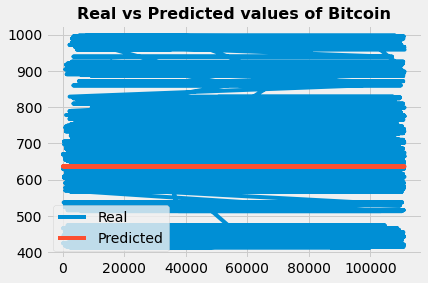

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.plot(stocks['Real'], label="Real")
plt.plot(stocks['Predicted'], label="Predicted")

# Add legend
plt.legend(loc='lower left')
# Add title and x, y labels
plt.title("Real vs Predicted values of Bitcoin", fontsize=16, fontweight='bold')
plt.figure(figsize=(10, 10))
plt.show()

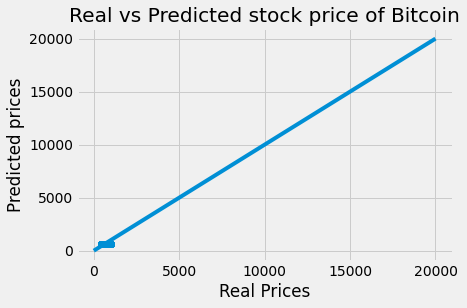

In [ ]:
plt.scatter(stocks['Real'],stocks['Predicted'] )
plt.plot(range(20000), range(20000))

plt.xlabel("Real Prices")
plt.ylabel("Predicted prices")
plt.title("Real vs Predicted stock price of Bitcoin")

plt.show()

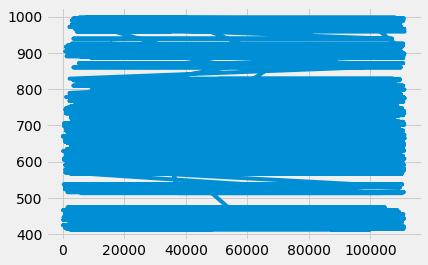

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(stocks['Real'], linestyle = 'solid')
plt.show()

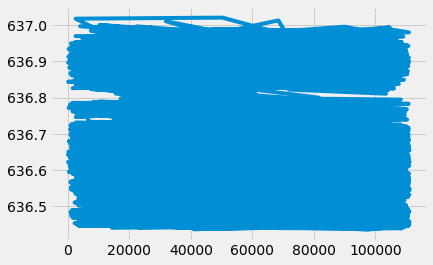

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(stocks['Predicted'], linestyle = 'solid')
plt.show()

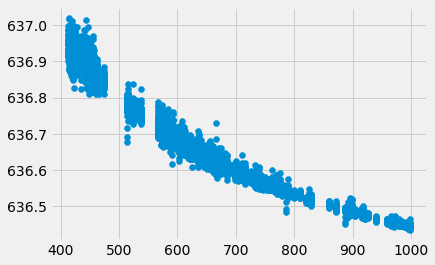

In [ ]:
plt.scatter(stocks['Real'], stocks['Predicted'])
plt.show()

In [ ]:
#So we have news articles from the date 2013/04/01(1st April,2013)to 2019/12/31(31st December,2019)
#We will collect stock prices accordingly from YahooFinance for BitCoin.